In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage.morphology import reconstruction


path = 'data/INS1_BF/2000/3765_A17_T0001F001L01A01Z01C01.tiff'

In [3]:
%ls data/INS1_BF/2000

3765_A17_T0001F001L01A01Z01C01.tiff
3765_A18_T0001F001L01A01Z01C01_cp_outlines.txt
3765_A18_T0001F001L01A01Z01C01_seg.npy
3765_A18_T0001F001L01A01Z01C01.tiff
3765_A19_T0001F001L01A01Z01C01.tiff
3765_A20_T0001F001L01A01Z01C01.tiff
3765_B17_T0001F001L01A01Z01C01.tiff
3765_B18_T0001F001L01A01Z01C01.tiff
3765_B19_T0001F001L01A01Z01C01.tiff
3765_B20_T0001F001L01A01Z01C01.tiff
3765_C17_T0001F001L01A01Z01C01.tiff
3765_C18_T0001F001L01A01Z01C01.tiff
3765_C19_T0001F001L01A01Z01C01.tiff
3765_C20_T0001F001L01A01Z01C01.tiff
3765_D17_T0001F001L01A01Z01C01.tiff
3765_D18_T0001F001L01A01Z01C01.tiff
3765_D19_T0001F001L01A01Z01C01.tiff
3765_D20_T0001F001L01A01Z01C01.tiff
3765_E17_T0001F001L01A01Z01C01.tiff
3765_E18_T0001F001L01A01Z01C01.tiff
3765_E19_T0001F001L01A01Z01C01.tiff
3765_E20_T0001F001L01A01Z01C01.tiff
3765_F17_T0001F001L01A01Z01C01.tiff
3765_F18_T0001F001L01A01Z01C01.tiff
3765_F19_T0001F001L01A01Z01C01.tiff
3765_F20_T0001F001L01A01Z01C01.tiff
3765_G17_T0001F001L01A01Z01C01.tiff
3765_G18_T0001

In [4]:
image = cv2.imread(path, -1)
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

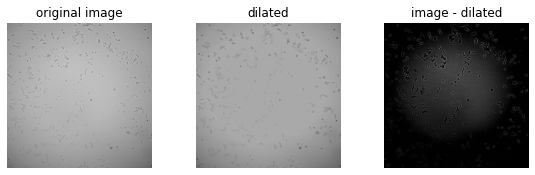

In [5]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

In [6]:
cv2.imwrite('dilated.tiff', dilated)
cv2.imwrite('subtracted.tiff', (dilated-image))

True

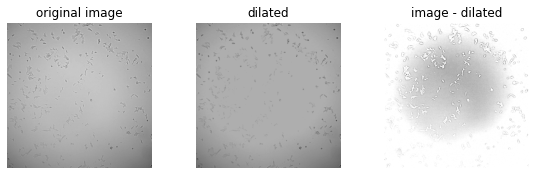

In [7]:
image2 = gaussian_filter(image, 1)

seed2 = np.copy(image2)
seed2[1:-1, 1:-1] = image2.min()
mask2 = image2

dilated2 = reconstruction(seed2, mask2, method='dilation')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image2, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated2, vmin=image2.min(), vmax=image2.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(dilated2-image2, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

In [8]:
cv2.imwrite('subtracted2.tiff', (dilated-image))

True

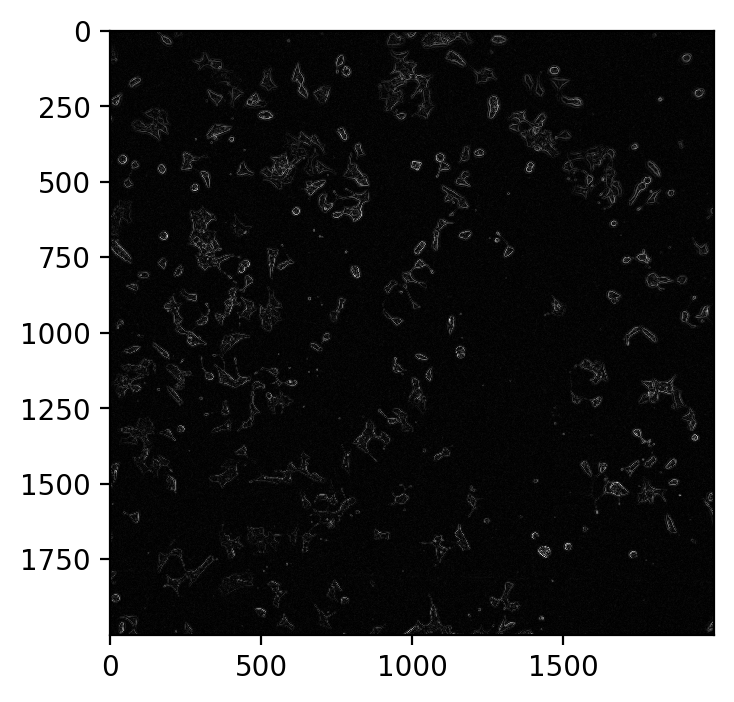

In [9]:
# using a sobel filters
from skimage import filters

sobel = filters.sobel(image)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

plt.imshow(sobel)

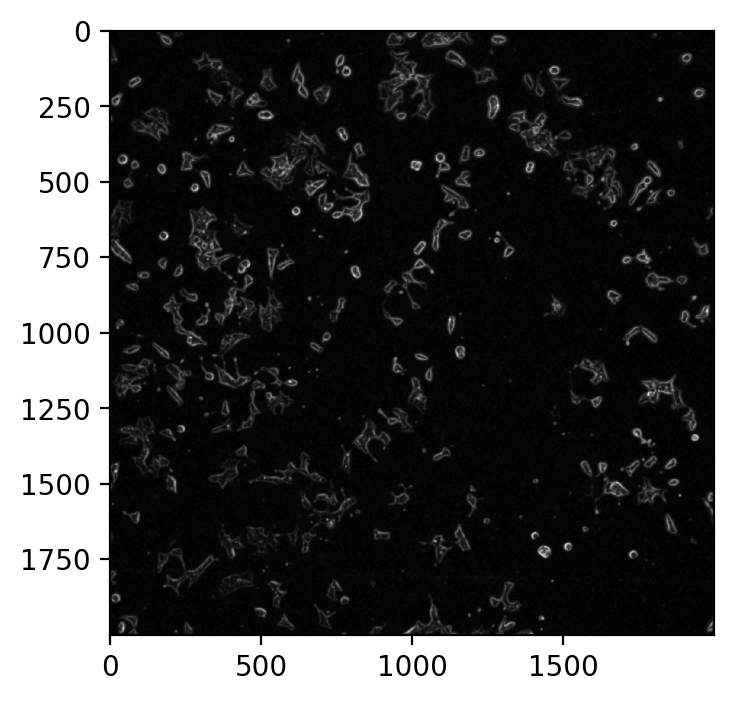

In [10]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

# Seeds for watershed transform

In [11]:
seed_mask = np.zeros(image.shape, dtype=np.int)
seed_mask.shape

(2000, 2000)

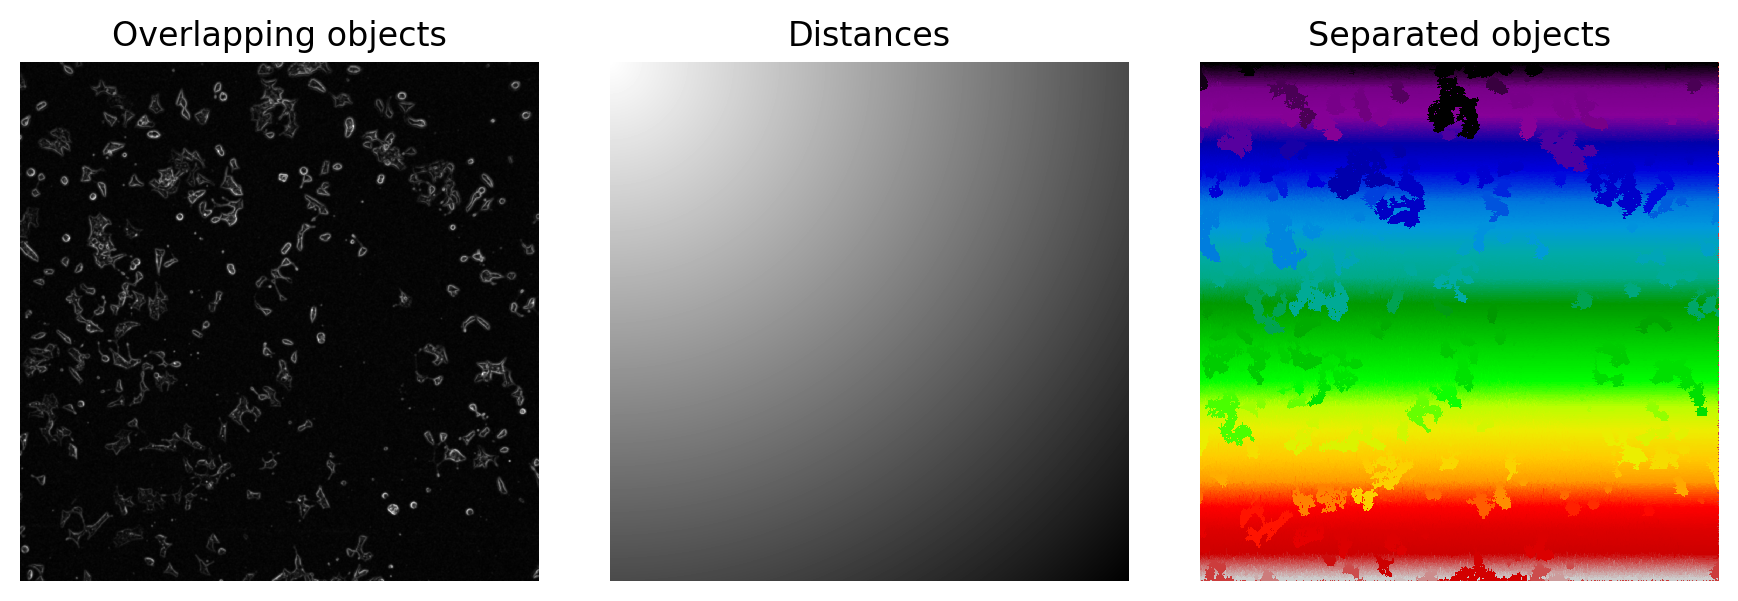

In [25]:
from scipy import ndimage as ndi
from skimage import segmentation
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(blurred)
coords = peak_local_max(distance, footprint=np.ones((20, 20)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = segmentation.watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blurred, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [26]:
from skimage import measure
labels = measure.label(blurred)

In [28]:
labels.shape

(2000, 2000)

In [29]:
print(labels.max())
print(labels.min())

0
0


In [34]:
temp = ndi.find_objects(image)

In [32]:
blurred

array([[0.0007135 , 0.00066572, 0.00060393, ..., 0.00027783, 0.00023167,
        0.00019306],
       [0.00072251, 0.00066833, 0.00060309, ..., 0.00030536, 0.00027234,
        0.00024527],
       [0.00070691, 0.00065315, 0.00058972, ..., 0.0003381 , 0.0003165 ,
        0.0002982 ],
       ...,
       [0.0003994 , 0.00043013, 0.00044917, ..., 0.00046783, 0.0004851 ,
        0.00049906],
       [0.00040112, 0.00043646, 0.00045918, ..., 0.00047434, 0.00050233,
        0.00052259],
       [0.00039239, 0.00042832, 0.00045109, ..., 0.00047839, 0.00051707,
        0.00054251]])

In [33]:
blurred.dtype

dtype('float64')

In [35]:
temp

[(slice(1965, 1966, None), slice(1993, 1994, None)),
 (slice(1965, 1966, None), slice(1992, 1993, None)),
 (slice(1964, 1965, None), slice(1993, 1994, None)),
 (slice(1966, 1967, None), slice(1992, 1993, None)),
 (slice(1966, 1967, None), slice(1993, 1994, None)),
 (slice(1964, 1965, None), slice(1992, 1993, None)),
 (slice(1965, 1966, None), slice(1994, 1995, None)),
 (slice(1975, 1976, None), slice(43, 44, None)),
 (slice(1348, 1349, None), slice(1938, 1939, None)),
 (slice(1964, 1965, None), slice(1994, 1995, None)),
 (slice(1963, 1964, None), slice(1993, 1994, None)),
 (slice(1976, 1977, None), slice(43, 44, None)),
 (slice(1975, 1976, None), slice(44, 45, None)),
 (slice(1974, 1975, None), slice(43, 44, None)),
 (slice(1349, 1350, None), slice(1938, 1939, None)),
 (slice(1963, 1964, None), slice(1994, 1995, None)),
 (slice(1967, 1968, None), slice(1992, 1993, None)),
 (slice(1974, 1975, None), slice(44, 45, None)),
 (slice(1959, 1960, None), slice(1998, 1999, None)),
 (slice(1966,

In [37]:
len(temp)

4507

In [39]:
print(blurred.shape)
print(blurred.max())
print(blurred.min())
print(blurred.mean())

(2000, 2000)
0.016242591902464094
0.00019306030359446895
0.0009369907930529471


In [42]:
blur_1k = blurred *10000
print(blur_1k.shape)
print(blur_1k.max())
print(blur_1k.min())
print(blur_1k.mean())

(2000, 2000)
162.42591902464093
1.9306030359446895
9.369907930529472


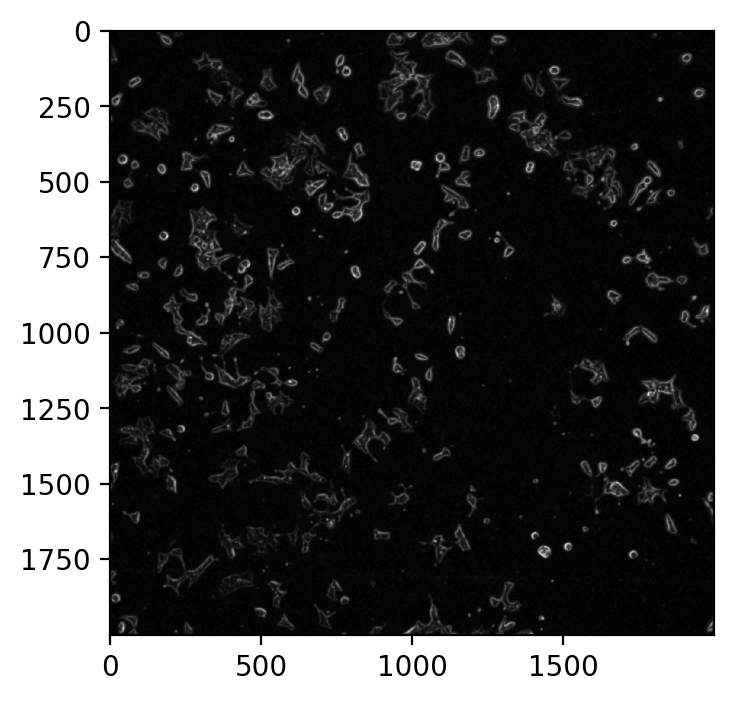

In [43]:
plt.imshow(blur_1k)

In [45]:
blur_10k = np.rint(blur_1k)
blur_10k = blur_10k.astype('uint16')
print(blur_10k.shape)
print(blur_10k.max())
print(blur_10k.min())
print(blur_10k.mean())

(2000, 2000)
162
2
9.36949325


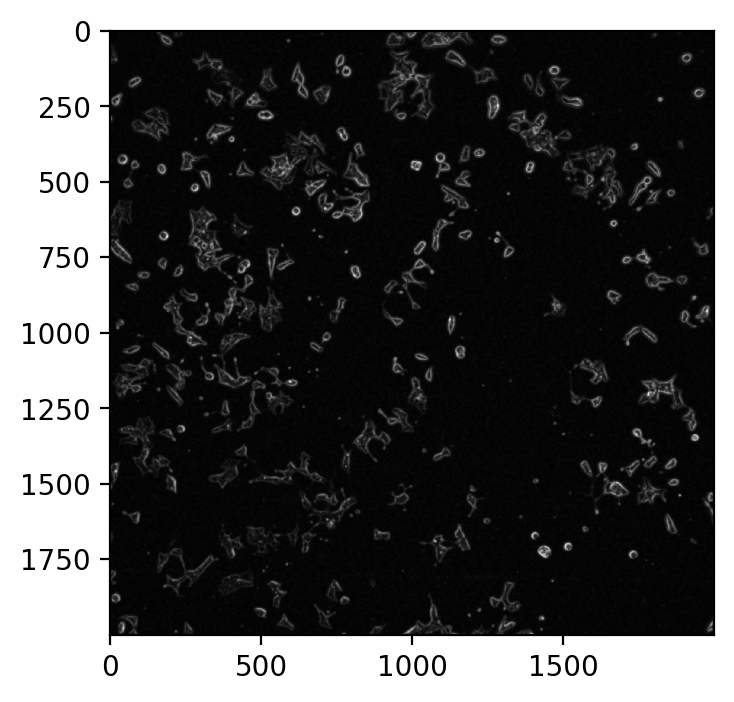

In [46]:
plt.imshow(blur_10k)

In [47]:
temp = ndi.find_objects(blur_10k)

In [48]:
temp

[None,
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slice(0, 2000, None), slice(0, 2000, None)),
 (slic

In [49]:
len(temp)

162

In [51]:
import tifffile
tifffile.imsave('blur_10k.tiff', blur_10k)

In [52]:
temp = np.arra(blur_10k[10, 10])
temp

4

In [53]:
temp.shape

()

# K-Means on blur_10k Image

In [61]:
blur_10k.shape

(2000, 2000)

In [67]:
from sklearn.cluster import KMeans
blursed = blur_10k.reshape((-1, 2))
kmeans = KMeans(n_clusters=5, random_state=0).fit(blursed)
out_image = kmeans.cluster_centers_[kmeans.labels_]

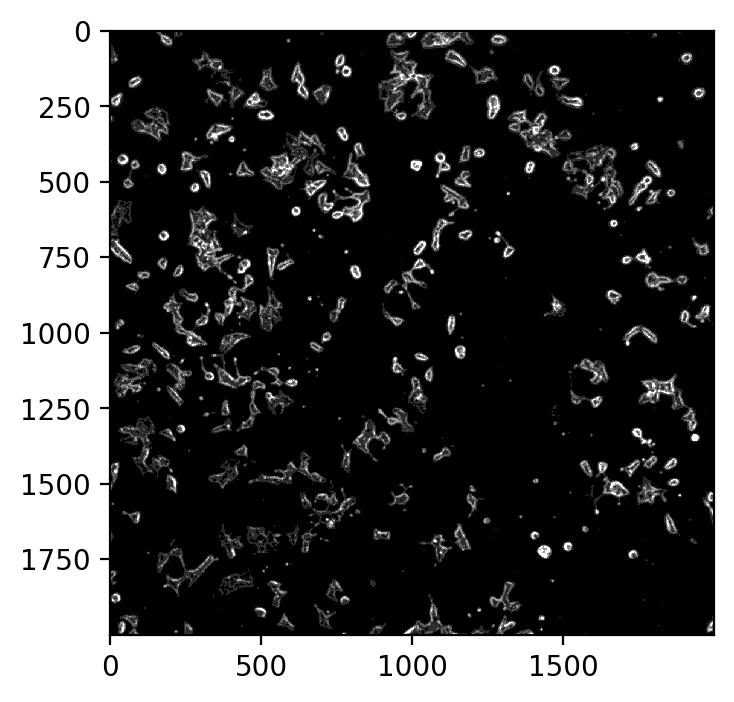

In [69]:
clustered = out_image.reshape(2000,2000)
plt.imshow(clustered)

In [70]:
tifffile.imsave('clustered.tiff', clustered)